In [279]:
import tensorflow as tf

# Updated for TensorFlow 2
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.14.0


#  Import Dataset


In [280]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [281]:
(x_train1, y_train1) = (x_train[:100], y_train[:100])



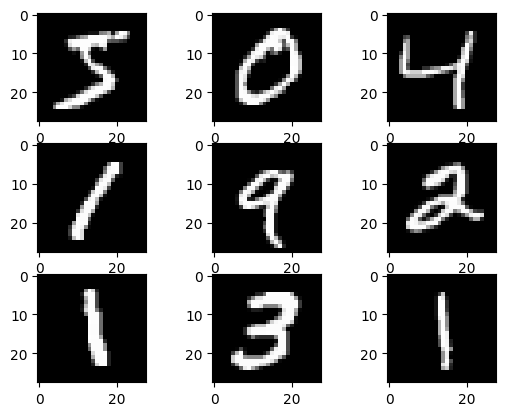

In [282]:

from keras.datasets import mnist
from matplotlib import pyplot

for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

## Data Augmentation


In [283]:
import numpy as np
import cv2
from tensorflow.keras.datasets import mnist
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = mnist.load_data()

augmented_images = []
augmented_labels = []
num_augmented_samples = 5000

labeled_images = []
labeled_images_labels = []

unlabeled_images = []

labeled_visited_indices = []

while len(labeled_images) < 100:
    index = np.random.randint(0, len(x_train))
    if index not in labeled_visited_indices:
      labeled_visited_indices.append(index)
      labeled_images.append(x_train[index])
      labeled_images_labels.append(y_train[index])



while len(augmented_images) < num_augmented_samples:
    index = np.random.randint(0, len(labeled_images))
    image = x_train[index]
    label = y_train[index]

    rotation_angle = np.random.uniform(-10, 10)
    scaling_factor = np.random.uniform(0.9, 1.1)

    M = cv2.getRotationMatrix2D((14, 14), rotation_angle, scaling_factor)
    augmented_image = cv2.warpAffine(image, M, (28, 28))

    augmented_images.append(augmented_image)
    augmented_labels.append(label)

unlabeled_images_size = 0
index = 0
while unlabeled_images_size < 59900:

  if index not in labeled_visited_indices:
    unlabeled_images.append(x_train[index])
    unlabeled_images_size += 1
  index += 1

unlabeled_images = np.array(unlabeled_images)

print("unlabeled_images.shape = " + str(unlabeled_images.shape))


augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)


labeled_images = np.concatenate((labeled_images, augmented_images), axis=0)
labeled_images_labels = np.concatenate((labeled_images_labels, augmented_labels), axis=0)

shuffle_indices = np.arange(len(labeled_images))
np.random.shuffle(shuffle_indices)
labeled_images = labeled_images[shuffle_indices]
labeled_images_labels = labeled_images_labels[shuffle_indices]


x_train1 = labeled_images
y_train1 = labeled_images_labels

print(labeled_images.shape)
print(labeled_images_labels.shape)

unlabeled_images.shape = (59900, 28, 28)
(5100, 28, 28)
(5100,)


In [284]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)

print('x_train 1 shape: ', x_train1.shape)
print('y_train 1 shape: ', y_train1.shape)



print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_train 1 shape:  (5100, 28, 28)
y_train 1 shape:  (5100,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


9


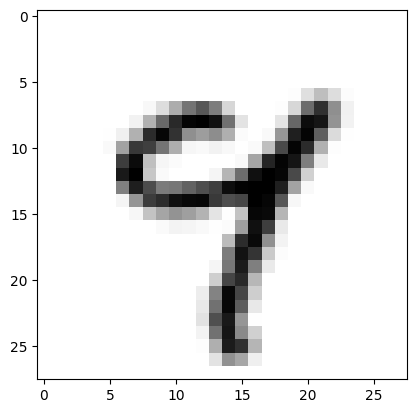

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline
print(y_train1[120])
plt.imshow(x_train1[120], cmap = 'binary')
plt.show()

In [286]:
y_train1[:10]

array([7, 7, 9, 2, 8, 0, 7, 1, 4, 2], dtype=uint8)

#  One Hot Encoding

Nous allons changer la façon dont cette étiquette est représentée d'un nom ou d'un numéro de classe à une liste de toutes les classes possibles avec toutes les classes définies sur 0 sauf celle à laquelle appartient cet exemple - qui sera définie sur 1. Par exemple :


| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |


In [287]:
from tensorflow.keras.utils import to_categorical

y_train1_encoded = to_categorical(y_train1)
y_test_encoded = to_categorical(y_test)

# Task 5: Preprocessing the Examples

Nous allons créer un réseau de neurones qui prendra 784 vecteurs dimensionnels comme entrées (28 lignes * 28 colonnes) et produira un vecteur à 10 dimensions (pour les 10 classes).


Nous avons déjà converti les sorties en vecteurs codés à 10 dimensions à chaud. Maintenant, convertissons également l'entrée au format requis.  Nous utiliserons numpy pour dérouler facilement les exemples de `(28, 28)`
tableaux à `(784, 1)` vecteurs.

In [290]:
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_train1_reshaped = np.reshape(x_train1, (5100, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train1_reshaped shape: ', x_train1_reshaped.shape)

print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train1_reshaped shape:  (5100, 784)
x_test_reshaped shape:  (10000, 784)


Les valeurs des pixels, dans cet ensemble de données, vont de 0 à 255. Même si cela convient si nous voulons afficher nos images, pour que notre réseau neuronal apprenne les poids et les biais des différentes couches, les calculs seront tout simplement beaucoup plus efficaces et rapides si nous * normalisé* ces valeurs. Afin de normaliser les données, nous pouvons calculer la moyenne et l'écart type pour chaque exemple.

In [291]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


Nous allons maintenant normaliser l'ensemble de formation et de test en utilisant la moyenne et l'écart type que nous venons de calculer.

In [292]:
epsilon = 1e-10
x_train1_norm = (x_train1_reshaped - x_mean)/(x_std + epsilon)

x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

# Creating a Model

Nous utilisons une classe Sequential définie dans Keras pour créer notre modèle qui contient 3 Dense layers.

In [294]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),

    Dense(10, activation = 'softmax')
])


Les premières couches utiliseront l'unité linéaire rectifiée de la fonction ReLU comme fonctions d'activation. La dernière couche utilisera *softmax*. Cette fonction nous donne des scores de probabilité pour différents nœuds, dans ce cas 10 nœuds de la couche de sortie, dont la somme atteint 1.

Afin d'optimiser les poids et les biais selon les données fournies. Nous utiliserons la descente de gradient stochastique.

Nous devons également définir une fonction de perte. Pour notre problème de classification multi-classes, *l'entropie croisée catégorielle* est couramment utilisée.

Enfin, nous utiliserons Accuracy comme mesure pour suivre notre training.

In [295]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the Model

Nous allons entraîner le modèle pendant 20 epochs.

In [296]:

h = model.fit(
    x_train1_norm,
    y_train1_encoded,
    epochs = 20
)

Epoch 1/20
160/160 [==============================] - 1s 2ms/step - loss: 0.7822 - accuracy: 0.8263
Epoch 2/20
160/160 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9896
Epoch 3/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9935
Epoch 4/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9945
Epoch 5/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9955
Epoch 6/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9965
Epoch 7/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9975
Epoch 8/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9976
Epoch 9/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 0.9980
Epoch 10/20
160/160 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9980

Maintenant, nous évaluons les performances du modèle sur l'ensemble de test.

In [297]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.7333 - accuracy: 0.7982
test set accuracy:  79.8200011253357


# Predictions

In [298]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)
preds


313/313 [==============================] - 0s 1ms/step
shape of preds:  (10000, 10)


array([[2.2573231e-05, 1.2764521e-07, 2.6716258e-05, ..., 9.9972236e-01,
        8.0479813e-06, 1.7757405e-04],
       [1.3708858e-01, 2.4674731e-04, 7.5958705e-01, ..., 2.2040983e-06,
        4.4229946e-05, 1.5752861e-05],
       [1.2756558e-06, 9.9936497e-01, 1.1870853e-04, ..., 8.6731025e-06,
        9.5235955e-06, 1.4753543e-05],
       ...,
       [1.5328855e-08, 2.3413479e-07, 2.7968615e-06, ..., 7.7741297e-06,
        1.1113478e-03, 8.2881522e-01],
       [8.7696329e-02, 5.8325916e-03, 8.6984661e-04, ..., 4.4019718e-04,
        7.6807966e-03, 1.3681086e-02],
       [3.8276130e-06, 1.1406491e-06, 1.8756441e-04, ..., 1.8818215e-10,
        1.2185468e-07, 6.6640188e-10]], dtype=float32)

# Confusion matrix

313/313 [==============================] - 0s 1ms/step


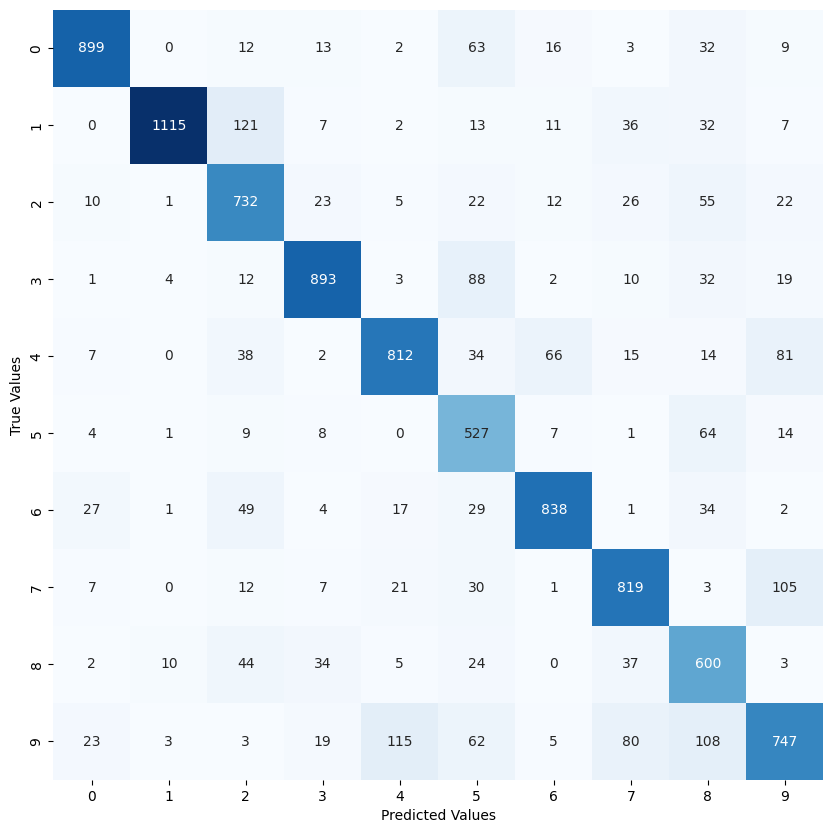

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Evaluer
res = model.predict(x_test_norm)
test_labels = np.argmax(res, axis=1)



fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = res 

Y_pred = np.argmax(y_pred, axis=1) 
Y_test = y_test 


mat = confusion_matrix(y_test, Y_pred) # Confusion matrix


# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();



# Semi-Supervised Learning

l'apprentissage semi-supervisé (SSL) est une technique d'apprentissage automatique qui utilise une petite partie de données étiquetées et de nombreuses données non étiquetées pour entraîner un modèle prédictif.

Le principe de fonctionnement est assez simple. Au lieu d'ajouter des balises à l'ensemble de données, vous parcourez et étiquetez manuellement seulement une petite partie des données et vous l'utilisez pour former un modèle, qui est ensuite appliqué à l'océan de données non étiquetées.

## Self-training
Dans cette méthode nous avons utilisé un des exemples d’apprentissage semi-supervisé, qui est Self-training.

**Self-training** est la procédure dans laquelle vous pouvez utiliser n'importe quelle méthode supervisée de classification ou de régression et la modifier pour travailler de manière semi-supervisée, en tirant parti des données étiquetées et non étiquetées


Le flux de travail standard est le suivant:
1. Nous avons pris 100 images étiquetées et nous avons augmenté les données, nous
utilisons cet ensemble de données pour entraîner notre modèle composé de réseaux de neurones denses.

2. Ensuite, nous avons appliqué le processus connu sous le nom de pseudo-étiquetage : nous prenons le modèle partiellement formé et l'utilisons pour faire des prédictions pour le reste de la base de données qui n'est pas encore étiquetée. Les étiquettes générées par la suite sont appelées pseudo car elles sont produites sur la base des données initialement étiquetées qui présentent des limites.

3. À partir de là, nous avons pris les prédictions les plus fiables faites avec notre modèle (dans notre cas, nous avons pris des images avec un niveau de confiance supérieur à 90%). Si l'un des pseudo-étiquettes dépasse ce niveau de confiance, nous les ajoutons à l'ensemble de données étiqueté et créons une nouvelle entrée combinée pour former un modèle amélioré.

4. Le processus passe par plusieurs itérations (jusqu'à ce que le modèle  converge) avec de plus en plus de pseudo-étiquettes ajoutées à chaque fois. À condition que les données soient adaptées au processus, les performances du modèle continueront d'augmenter à chaque itération.



In [301]:
x_train2_reshaped = np.reshape(x_train[100:], (59900, 784))
x_train2_norm = (x_train2_reshaped - x_mean)/(x_std + epsilon)

In [303]:
unlabeled_images = x_train2_norm
labeled_images = x_train1_norm
labeled_images_labels = y_train1

In [ ]:

best_accuracy=0
best_model=model
while (len(unlabeled_images ) > 0):
   pseudo_labels = model.predict(unlabeled_images)



   threshold = 0.90
   high_confidence_indices = np.max(pseudo_labels, axis=1) > threshold


   pseudo_labeled_data = unlabeled_images[high_confidence_indices]
   pseudo_labeled_labels = np.argmax(pseudo_labels[high_confidence_indices], axis=1)


   x_combined = np.concatenate((labeled_images, pseudo_labeled_data), axis=0)
   y_combined = np.concatenate((labeled_images_labels, pseudo_labeled_labels), axis=0)
   y_combined_encoded = to_categorical(y_combined)


   model.fit(x_combined, y_combined_encoded, epochs=5)
   loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

   if (accuracy > best_accuracy ):
     best_accuracy=accuracy
     best_model=model


   print('test set accuracy: ', accuracy * 100)
   unlabeled_images_before = len(unlabeled_images)
   # remove predictions with hight confidence
   print('length of unlabeled_images Before', unlabeled_images_before)
   unlabeled_images= unlabeled_images[high_confidence_indices == False]
   unlabeled_images_after = len(unlabeled_images)
   print('length of unlabeled_images After', unlabeled_images_after)
   if (unlabeled_images_before ==  unlabeled_images_after):
    break

In [306]:
best_model.save("model_DNN.keras")

In [307]:
loss, accuracy = best_model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 0s 2ms/step - loss: 1.2236 - accuracy: 0.8612
test set accuracy:  86.11999750137329


313/313 [==============================] - 1s 2ms/step


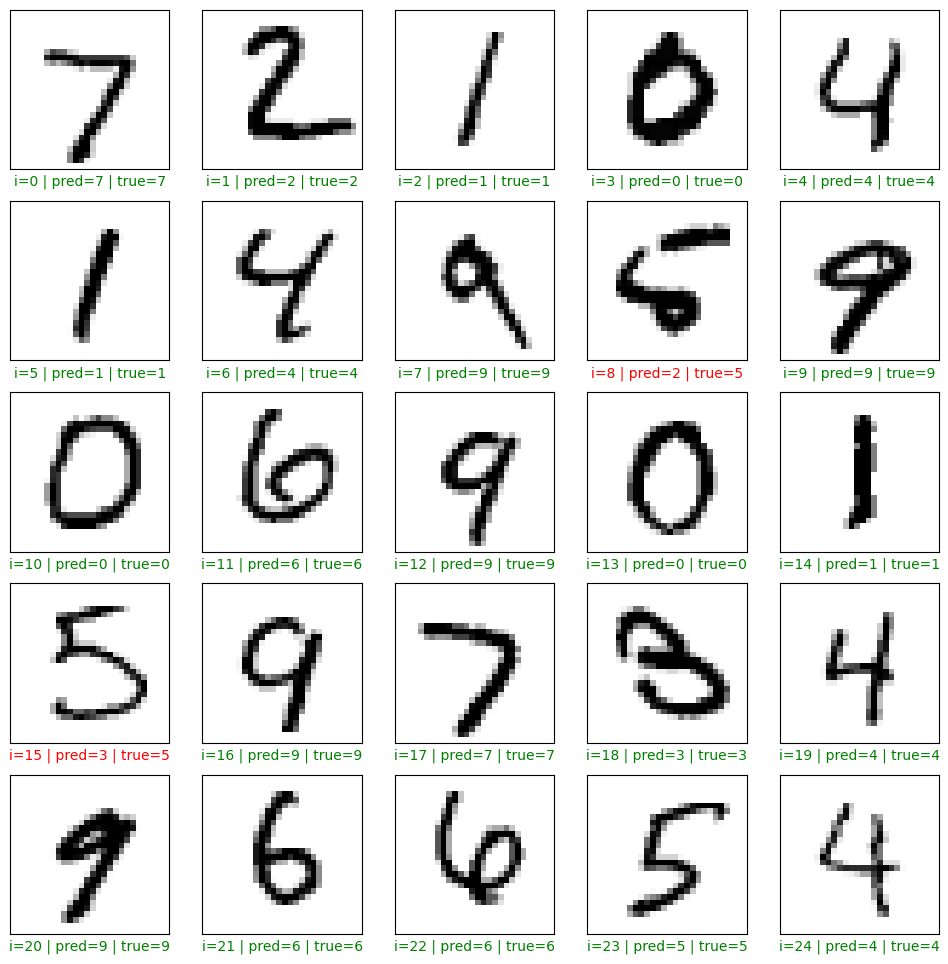

In [308]:
preds = best_model.predict(x_test_norm)
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

313/313 [==============================] - 0s 1ms/step


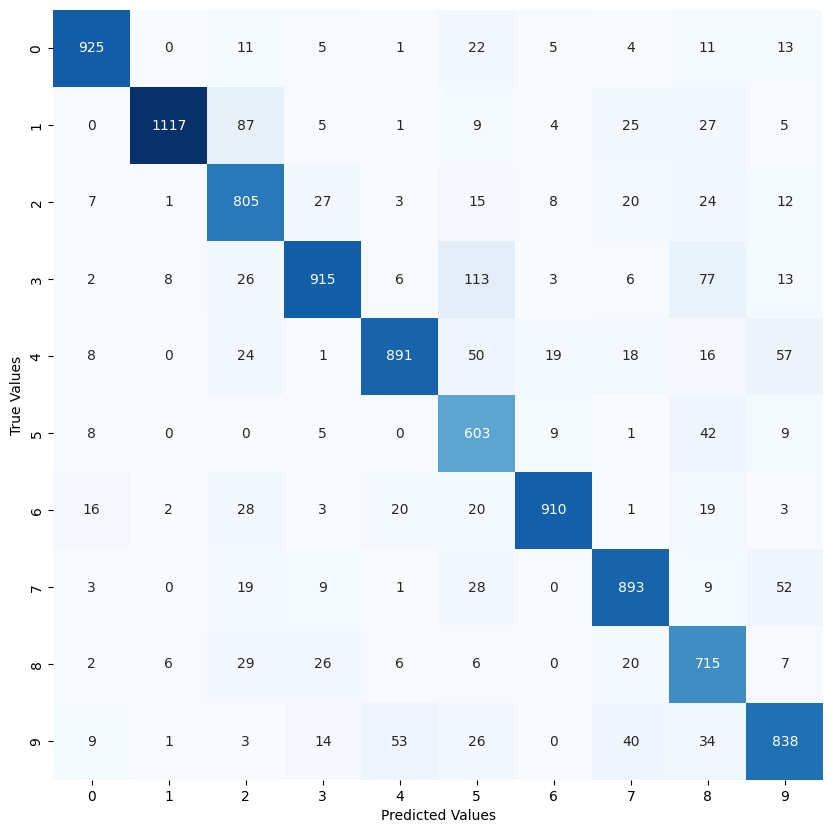

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Evaluer
res = best_model.predict(x_test_norm)
test_labels = np.argmax(res, axis=1)



fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = res 

Y_pred = np.argmax(y_pred, axis=1) 
Y_test = y_test 


mat = confusion_matrix(y_test, Y_pred) # Confusion matrix


# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

